MACHINE LERNING PIPLEINE BY: Okello Isaac Opio

Stuyd title: 

**GENETIC, BIOLOGICAL AND PSYCHOSOCIAL PREDICTORS OF INCIDENT AND PERSISTENT INTERNALIZING MENTAL DISORDERS AMONG UGANDAN CHILDREN AND ADOLESCENTS LIVING WITH HIV: A MACHINE LEARNING APPROACH**

**General Objective**

The general objective of this study is to investigate the predictors of Internalizing Mental Disorders among Ugandan children and adolescents living with HIV using a machine learning approach. 

**Specific Objectives**
- To build a machine learning model for prediction of prevalent, incident, and persistent cases of Internalizing Mental Disorders among Ugandan children and adolescents living with HIV.
- To evaluate the performance of the machine learning model (developed in 1 above) based on each of Genetic, Biological, and Psychosocial factors respectively.
- To evaluate the performance of the machine learning model based on the combination of all the three factor domains of Genetic, Biological, and Psychosocial factors. 


**STEPS**

The project roadmap
1. Prepare Problem
a) Load libraries
b) Load dataset

2. Summarize Data
a) Descriptive statistics
b) Data visualizations

3. Prepare Data
a) Data Cleaning
b) Feature Selection
c) Data Transforms

4. Evaluate Algorithms
a) Split-out validation dataset
b) Test options and evaluation metric
c) Spot Check Algorithms
d) Compare Algorithms

5. Improve Accuracy
a) Algorithm Tuning

6. Finalize Model
a) Predictions on validation dataset
b) Create standalone model on entire training dataset

7. Feature importance selection

In [1]:
# IMD Python Project Pipeline
# Load libraries
#import the necessary libraries

import pandas as pd # For the manipulation of tabular data
import numpy as np # For improved numerical calculation
from ydata_profiling import ProfileReport # For exploratory data analysis reporting
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For improved plot outlook
import pandas_profiling


%matplotlib inline 
#Tells Jupyter to display any matplotlib plots directly within the notebook, rather than in a separate. Alt: plt.show()

# Importing the scaler
from sklearn.preprocessing import StandardScaler

# Importing required models and metrics
# Importing necessary modules for cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Importing classifiers based on their functionalities

# Logistic Regression: A linear model for classification tasks, often used for binary classification
from sklearn.linear_model import LogisticRegression  
# Gaussian Naive Bayes: A probabilistic classifier based on Bayes' theorem with Gaussian distribution assumption
from sklearn.naive_bayes import GaussianNB  
# K-Nearest Neighbors: A non-parametric method used for classification based on nearest training examples
from sklearn.neighbors import KNeighborsClassifier  
# Decision Tree: A non-linear model that partitions the feature space into regions to make predictions
from sklearn.tree import DecisionTreeClassifier  
# Support Vector Classifier: A powerful classifier that finds the hyperplane that best separates classes in high-dimensional space
from sklearn.svm import SVC  

# Importing ensemble classifiers
# Random Forest: An ensemble method that builds multiple decision trees and combines their predictions
from sklearn.ensemble import RandomForestClassifier  
# Gradient Boosting Classifier: An ensemble method that builds trees sequentially, each correcting the mistakes of the previous one
from sklearn.ensemble import GradientBoostingClassifier  
# AdaBoost Classifier: An ensemble method that combines multiple weak learners to build a strong classifier
from sklearn.ensemble import AdaBoostClassifier  

# Removing the warnings from the cells by importing the warnings module

import warnings
warnings.filterwarnings('ignore')  # Setting up a filter to ignore warnings. Good if you are confident with the codes

C:\Users\isaac\AppData\Local\Temp\ipykernel_14036\3152255172.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
# b) Load dataset
IMD_Data = pd.read_stata("Dataset MAY -Stats Persistence IMD.dta")
IMD_Data.head(5)

age Age_Category    sex1   childeduc1   religion1 BMI_category  \
0  4.525667         9-12  Female  Pre-primary      Muslim  Underweight   
1  5.015743          5-8    Male  Pre-primary  Christians  Underweight   
2  5.045859          5-8    Male  Pre-primary  Christians  Underweight   
3  5.045859         9-12  Female  Pre-primary  Christians  Underweight   
4  5.054072          5-8    Male  Pre-primary  Christians  Underweight   

  childtrib1           orphanhood                    ses_cat Support_Program  \
0    Muganda   Both parents alive   high socioecnomic status             NaN   
1    Muganda   Both parents alive   high socioecnomic status              No   
2    Muganda  Single parent alive  low socio-economic status              No   
3    Muganda   Both parents alive  low socio-economic status              No   
4    Muganda   Both parents alive  low socio-economic status              No   

   ... httlpr1 HTTLPRrs35531 rs35531 Rs10482605_enc Rs1360780_enc  \
0  ...      LL           NaN     NaN            NaN           NaN   
1  ...      LS         LA/SA     A:A            G:A           C:C   
2  ...      LL         LA/LG     A:G            A:A           C:T   
3  ...      LL         LA/LG     A:G            G:A           C:C   
4  ...      LS         SA/LG     A:G            A:A           C:T   

  rs1386494_enc rs1843809_enc  rs34517220_enc  GroupCategory  IMDs  
0           NaN           NaN             NaN          cases   Yes  
1           G:G           T:G             G:A          cases   Yes  
2           G:G           T:G             G:A          cases   Yes  
3           G:G           T:G             G:G          cases   Yes  
4           G:G           T:T             A:A          cases    No  

[5 rows x 32 columns]

In [3]:
# List variable names
variable_names = IMD_Data.columns.tolist()

# Print the variable names
print(variable_names)

['age', 'Age_Category', 'sex1', 'childeduc1', 'religion1', 'BMI_category', 'childtrib1', 'orphanhood', 'ses_cat', 'Support_Program', 'childartk1', 'childpremt1', 'chilborhiv', 'Stress', 'childworst1', 'CD4_category', 'Viralload_Category', 'tlbase', 'tl12', 'tldiff', 'telomere_length_change', 'stin2vntr_', 'httlpr1', 'HTTLPRrs35531', 'rs35531', 'Rs10482605_enc', 'Rs1360780_enc', 'rs1386494_enc', 'rs1843809_enc', 'rs34517220_enc', 'GroupCategory', 'IMDs']


In [4]:
columns_to_drop = ['age', 'GroupCategory', 'tldiff']

# Dropping the specified columns
IMD_Dataset = IMD_Data.drop(columns=columns_to_drop)

**Summarize Data**

Descriptive statistics

Data visualizations

In [5]:
# 2. Summarize Data
# a) Descriptive statistics
IMD_Dataset.dtypes

Age_Category              category
sex1                      category
childeduc1                category
religion1                 category
BMI_category              category
childtrib1                category
orphanhood                category
ses_cat                   category
Support_Program           category
childartk1                category
childpremt1               category
chilborhiv                category
Stress                    category
childworst1               category
CD4_category              category
Viralload_Category        category
tlbase                     float64
tl12                       float64
telomere_length_change    category
stin2vntr_                category
httlpr1                   category
HTTLPRrs35531             category
rs35531                   category
Rs10482605_enc            category
Rs1360780_enc             category
rs1386494_enc             category
rs1843809_enc             category
rs34517220_enc            category
IMDs                

In [6]:
IMD_Dataset.shape

(368, 29)

In [7]:
IMD_Dataset.describe().T

count      mean       std       min       25%       50%       75%  \
tlbase  307.0  1.198068  0.364150  0.105856  0.994869  1.196082  1.377054   
tl12    278.0  0.925171  0.335587  0.191179  0.724868  0.873149  1.056067   

             max  
tlbase  2.130282  
tl12    2.189599

In [8]:
# Checking for duplicates
IMD_Dataset.duplicated().sum()


0

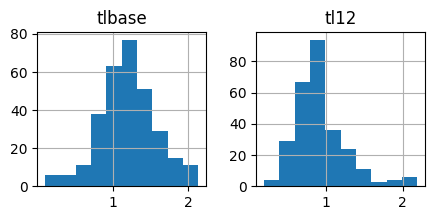

In [9]:
# b) Data visualizations
#Visualize the distribution of data in the dataset and identify any potential outliers or skewness in the data.
IMD_Dataset.hist(figsize=(5,2));

In [10]:
# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms



In [11]:
# create a copy of the original dataset with a new name
IMD_Copy = IMD_Dataset.copy()

# create an EDA report using pandasprofiling
profile = IMD_Copy.profile_report()

#Saving the profile report
profile.to_file("Persistent_IMD_Profile_Report.html")

# Display the profile report
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Observations from pandas profiling
- `General Statistics:` There were about 30 variables. with 736 observations. The missing cells composed of 3.4%. There were no duplicates.
- `Presence of categorical data:` There were 15 variables that were tagged as categorical data and this informed our decision to perform label encoding on them as machine learning algorithms only work on non-categorical data.
- `Presence of a variables that were in ranges greater than [0,1]:` There was a total of three variables with a range greater than [0,1] and this informed our decision to carry out minmax scaling during data transformation to normalise those variables. Some of the variables included: height1, weight1, and tlbase. 
- `Presence of a highly imbalanced variable:` There were over 15 varaibles that were imbalanced and this informed our decision on the metrcs for selcetion of best model

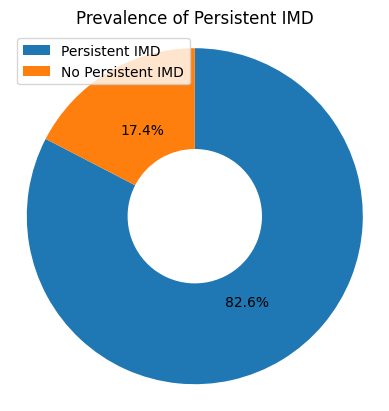

In [12]:
# Proportion of fetal health classes
plt.pie(IMD_Copy['IMDs'].value_counts(), startangle = 90, counterclock = False, autopct='%1.1f%%', wedgeprops = {'width' : 0.6});
plt.axis('square')
plt.legend(['Persistent IMD','No Persistent IMD'])
plt.title("Prevalence of Persistent IMD");

MISSING VALUE IMPUTATIONS

In [13]:
# Missing Values before Imputations
IMD_Copy.isnull().sum()

Age_Category                0
sex1                        0
childeduc1                  2
religion1                   0
BMI_category                1
childtrib1                  0
orphanhood                  8
ses_cat                     0
Support_Program             3
childartk1                  0
childpremt1                 1
chilborhiv                  0
Stress                      0
childworst1                 0
CD4_category                2
Viralload_Category         66
tlbase                     61
tl12                       90
telomere_length_change    137
stin2vntr_                 27
httlpr1                    10
HTTLPRrs35531              21
rs35531                    21
Rs10482605_enc             59
Rs1360780_enc              18
rs1386494_enc              16
rs1843809_enc              19
rs34517220_enc             17
IMDs                        0
dtype: int64

**IMPUTATIONS**

In [14]:

# Impute missing values in numerical variables with mean
numerical_columns = IMD_Copy.select_dtypes(include=['float64', 'int64']).columns
IMD_Copy[numerical_columns]= IMD_Copy[numerical_columns].fillna(IMD_Copy[numerical_columns].mean())

# Impute missing values in categorical variables with mode
categorical_columns = IMD_Copy.select_dtypes(include=['object', 'category']).columns
IMD_Copy[categorical_columns] = IMD_Copy[categorical_columns].fillna(IMD_Copy[categorical_columns].mode().iloc[0])

# Check if all missing values are imputed
print("Missing Values after Imputation:")
print(IMD_Copy.isnull().sum())

Missing Values after Imputation:
Age_Category              0
sex1                      0
childeduc1                0
religion1                 0
BMI_category              0
childtrib1                0
orphanhood                0
ses_cat                   0
Support_Program           0
childartk1                0
childpremt1               0
chilborhiv                0
Stress                    0
childworst1               0
CD4_category              0
Viralload_Category        0
tlbase                    0
tl12                      0
telomere_length_change    0
stin2vntr_                0
httlpr1                   0
HTTLPRrs35531             0
rs35531                   0
Rs10482605_enc            0
Rs1360780_enc             0
rs1386494_enc             0
rs1843809_enc             0
rs34517220_enc            0
IMDs                      0
dtype: int64


### Scaling
Ploting the data before rescaling

<Axes: >

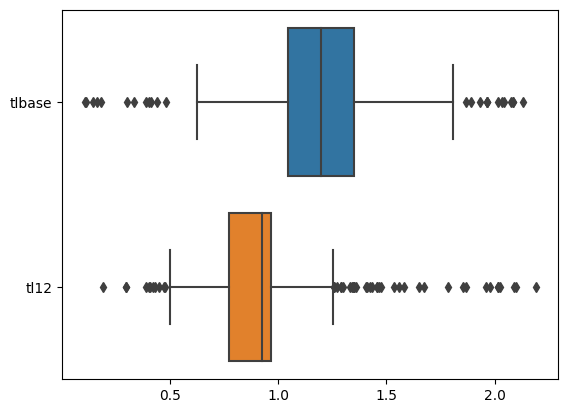

In [15]:
sns.boxplot(IMD_Copy, orient = 'h')

<Axes: >

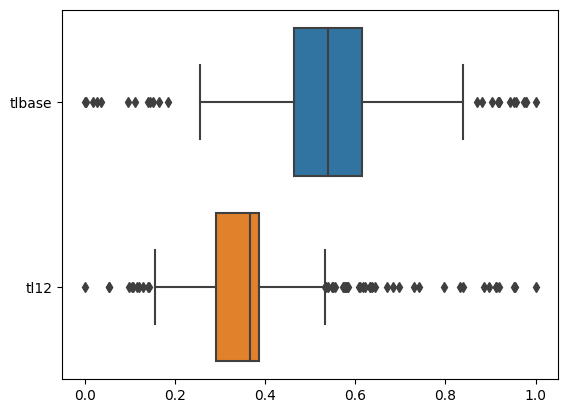

In [16]:
# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
IMD_Copy[['tlbase', 'tl12']] = scaler.fit_transform(IMD_Copy[['tlbase', 'tl12']])
#print(IMD_Copy.head(5))
sns.boxplot(IMD_Copy, orient = 'h')

*Droping tldiff*

PI had to drop this becuase it failed to imput misisng values, even after trying to transform. Presence of missing values was affecting model training. 

In [17]:
# # Drop the original 'tldiff' column
# IMD_Copy.drop(columns=['tldiff'], inplace=True)


In [18]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [19]:
# Label encode the IMD_Copy variable if it's categorical
for column in IMD_Copy.columns:
    if IMD_Copy[column].dtype == 'object' or IMD_Copy[column].dtype.name == 'category':
        label_encoder = LabelEncoder()
        IMD_Copy[column] = label_encoder.fit_transform(IMD_Copy[column])
IMD_Copy.head(5)

Age_Category  sex1  childeduc1  religion1  BMI_category  childtrib1  \
0             2     0           1          1             3           0   
1             1     1           1          0             3           0   
2             1     1           1          0             3           0   
3             2     0           1          0             3           0   
4             1     1           1          0             3           0   

   orphanhood  ses_cat  Support_Program  childartk1  ...  stin2vntr_  httlpr1  \
0           0        0                0           1  ...           2        0   
1           0        0                0           1  ...           1        1   
2           2        1                0           1  ...           1        0   
3           0        1                0           1  ...           2        0   
4           0        1                0           0  ...           1        1   

   HTTLPRrs35531  rs35531  Rs10482605_enc  Rs1360780_enc  rs1386494_enc  \
0              0        0               0              1              2   
1              2        0               1              0              2   
2              1        1               0              1              2   
3              1        1               1              0              2   
4              5        1               0              1              2   

   rs1843809_enc  rs34517220_enc  IMDs  
0              1               1     1  
1              1               1     1  
2              1               1     1  
3              1               2     1  
4              2               0     0  

[5 rows x 29 columns]

In [20]:
# create an EDA report using pandasprofiling
profile3 = IMD_Copy.profile_report()

#Saving the profile report
profile3.to_file("Profile_Transformed_Imputed.html")

# Display the profile report
display(profile3)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
# Since IMD_Copy contains both features and the target variable
# Separate features and target variable
features = IMD_Copy.drop('IMDs', axis=1)
target = IMD_Copy['IMDs']

In [22]:
# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms



**Model Spot-checking**

The following classifiers have been used in the model spot-checking
- Dummy Classifier - Not Included to check for accuracy given only most frequent class is always predicted as target. Taken as lower baseline classifier.
- Logistic Regression
- Naive Bayes
- K-Nearest Neighbours
- Support Vector Machines - Support Vector Classifier
- Decision Trees
- Ensemble classifiers (Random Forests, Gradient Boosting Classifier and AdaBoostClassifier)

The chosen evaluation metric was `f1-score`. However, other metrics `precision`, `recall`, `roc_auc` were also employed to do model spot checking.

The **`_weighted`** versions of the metrics have been used to cater for `target imbalances` in the data. For `roc_auc`, the **`_ovo` (one versus one (ovo))** was used to cater for `imbalances` in the data too. The ovo is insensitive to data label imbalances unlike the `one versus rest` version.

The `StratifiedKFold` was used in `cross validation` to ensure each `split` contains equivalent proportions of the different `classes` in the data.

At first, the `DummyClassifier` was used to set a `baseline score` given one choses the target value at random or selects the most frequent class.

In [23]:
# from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiating the models
# dc = DummyClassifier(strategy='most_frequent')
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
sv = SVC(probability=True)  # Probability set to True to return a non-NaN roc_auc
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ad = AdaBoostClassifier()
lda = LinearDiscriminantAnalysis()

from sklearn.model_selection import StratifiedKFold

# Setting the StratifiedKFold parameter
skfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
# ^ This creates a StratifiedKFold object with 10 splits, ensuring that each fold has approximately the same class distribution as the original dataset.
#   `random_state=42` ensures reproducibility of results, while `shuffle=True` shuffles the data before splitting into folds.

Note: The code block eblow facilitates the evaluation of multiple machine learning models using cross-validation and tracks performance metrics such as F1 score, precision, recall, accuracy, and ROC AUC. It's a structured approach to compare the performance of different models on a dataset.

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# Define models and scores as you did
models = [lr, nb, knn, dt, sv, rf, gb, ad, lda]
scores = ["f1_weighted", "precision_weighted", "recall_weighted", "accuracy", "roc_auc_ovo_weighted"]

# Initialize lists to store scores for each model
f1 = []
precision = []
recall = []
accuracy = []
roc_auc = []
score_lists = [f1, precision, recall, accuracy, roc_auc]

# Define the number of folds for cross-validation
n_splits = 10  # You can adjust this number as needed

# Split the data into training and testing sets
# Assuming features and target are already defined
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize StratifiedKFold for cross-validation
skfold = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

# For loop to evaluate the models
for model in models:
    print(model)
    for index, score in enumerate(scores):
        cv_scores = cross_val_score(model, X_train, y_train, cv=skfold, scoring=score)
        score_lists[index].append(np.mean(cv_scores))
        print(score + " : " + str(np.mean(cv_scores)))
    print("\n")


LogisticRegression()
f1_weighted : 0.7685401184176491
precision_weighted : 0.7217025102875281
recall_weighted : 0.8232183908045977
accuracy : 0.8232183908045977
roc_auc_ovo_weighted : 0.6378333333333333


GaussianNB()
f1_weighted : 0.649330669516085
precision_weighted : 0.72159653564826
recall_weighted : 0.6516091954022989
accuracy : 0.6516091954022989
roc_auc_ovo_weighted : 0.5411666666666667


KNeighborsClassifier()
f1_weighted : 0.8041373125027302
precision_weighted : 0.7857449014850918
recall_weighted : 0.8439080459770116
accuracy : 0.8439080459770116
roc_auc_ovo_weighted : 0.6588999999999999


DecisionTreeClassifier()
f1_weighted : 0.7530965418807826
precision_weighted : 0.7636401706554131
recall_weighted : 0.7620689655172415
accuracy : 0.7448275862068966
roc_auc_ovo_weighted : 0.5236666666666667


SVC(probability=True)
f1_weighted : 0.7770875092280427
precision_weighted : 0.7178491214163033
recall_weighted : 0.8471264367816091
accuracy : 0.8471264367816091
roc_auc_ovo_weighted : 

Logistic regression was chosen as the best model

In [25]:
# Define a dictionary to store mean scores for each model and metric
model_scores = {}

# Populate the dictionary with mean scores for each model and metric
for model, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score in zip(models, f1, precision, recall, accuracy, roc_auc):
    model_scores[model] = {
        "F1 Score": f1_score,
        "Precision": precision_score,
        "Recall": recall_score,
        "Accuracy": accuracy_score,
        "ROC AUC": roc_auc_score
    }

# Sort models based on each metric's score in descending order
sorted_models = {}
for metric in model_scores[model].keys():
    sorted_models[metric] = sorted(model_scores.keys(), key=lambda x: model_scores[x][metric], reverse=True)

# Print models in descending order for each metric
for metric, models in sorted_models.items():
    print(metric)
    for rank, model in enumerate(models, start=1):
        print(f"{rank}. {model}: {model_scores[model][metric]}")
    print()


F1 Score
1. KNeighborsClassifier(): 0.8041373125027302
2. RandomForestClassifier(): 0.7824273093108486
3. GradientBoostingClassifier(): 0.7798665540542382
4. SVC(probability=True): 0.7770875092280427
5. LogisticRegression(): 0.7685401184176491
6. AdaBoostClassifier(): 0.7651121017892613
7. LinearDiscriminantAnalysis(): 0.7590018820088857
8. DecisionTreeClassifier(): 0.7530965418807826
9. GaussianNB(): 0.649330669516085

Precision
1. KNeighborsClassifier(): 0.7857449014850918
2. DecisionTreeClassifier(): 0.7636401706554131
3. GradientBoostingClassifier(): 0.7460472435038428
4. AdaBoostClassifier(): 0.7386517058930852
5. RandomForestClassifier(): 0.7342963780835363
6. LinearDiscriminantAnalysis(): 0.7241724062919069
7. LogisticRegression(): 0.7217025102875281
8. GaussianNB(): 0.72159653564826
9. SVC(probability=True): 0.7178491214163033

Recall
1. RandomForestClassifier(): 0.8540229885057471
2. SVC(probability=True): 0.8471264367816091
3. KNeighborsClassifier(): 0.8439080459770116
4. Gra

Note:
Accuracy: This metric measures the proportion of correctly classified instances out of all instances. It's suitable when the class distribution is balanced and all classes are equally important.

Precision: Precision measures the proportion of true positive predictions out of all positive predictions. It's useful when the cost of false positives is high.

Recall (Sensitivity): Recall measures the proportion of true positive predictions out of all actual positive instances. It's valuable when the cost of false negatives is high.

F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is suitable when there's an uneven class distribution.

ROC AUC: Receiver Operating Characteristic Area Under the Curve (ROC AUC) measures the area under the ROC curve, which plots the true positive rate against the false positive rate. It's suitable for binary classification problems, especially when class imbalance exists.

### Improving Accuracy

#### Hyperparameter tuning
Hyperparameter tuning is used to optimize the performance of machine learning models by searching for the best set of hyperparameters. Hyperparameters are settings that are not learned from the data but are set prior to training, such as the regularization strength in logistic regression, the depth of a decision tree, or the number of trees in a random forest.

Hyperparameter tuning is typically performed after selecting a model and before evaluating its performance on unseen data (e.g., a holdout test set). Here's a breakdown of the typical workflow involving hyperparameter tuning:

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the grid of hyperparameters for each model
# param_grid_dc = {}  # DummyClassifier does not have hyperparameters
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_nb = {}  # GaussianNB does not have hyperparameters
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_dt = {'max_depth': [None, 5, 10, 20]}
param_grid_sv = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
param_grid_ad = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
param_grid_lda = {}  # LinearDiscriminantAnalysis does not have hyperparameters

# Define models to tune
models_to_tune = {'Logistic Regression': (lr, param_grid_lr),
                  'Gaussian Naive Bayes': (nb, param_grid_nb),
                  'K-Nearest Neighbors': (knn, param_grid_knn),
                  'Decision Tree': (dt, param_grid_dt),
                  'Support Vector Classifier': (sv, param_grid_sv),
                  'Random Forest': (rf, param_grid_rf),
                  'Gradient Boosting': (gb, param_grid_gb),
                  'AdaBoost': (ad, param_grid_ad),
                  'Linear Discriminant Analysis': (lda, param_grid_lda)}



IF ACCURACY IS USED TO CHOOSE THE BEST MODEL

Random Forest: 0.8574712643678162
Logistic Regression: 0.8471264367816091
K-Nearest Neighbors: 0.8471264367816091
Support Vector Classifier: 0.8471264367816091
Gradient Boosting: 0.8471264367816091
AdaBoost: 0.8471264367816091
Linear Discriminant Analysis: 0.7994252873563219
Decision Tree: 0.7786206896551724
Gaussian Naive Bayes: 0.6516091954022989

Best Model Selected: Random Forest


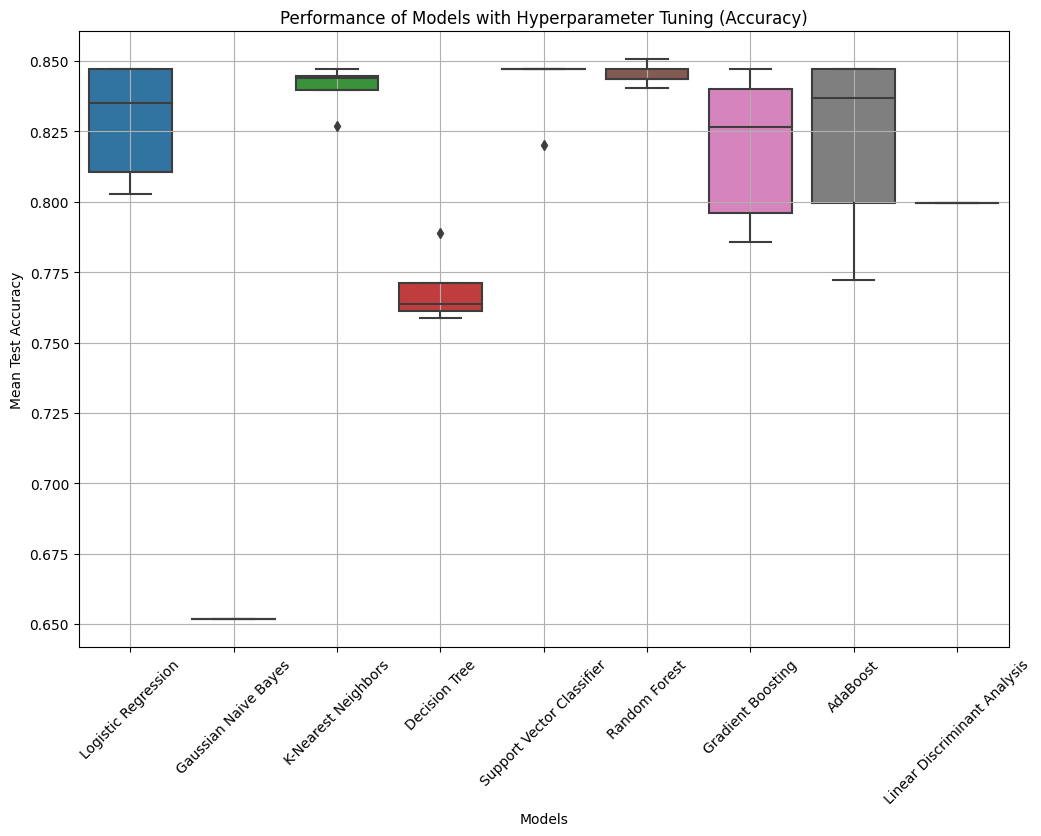

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Perform grid search for each model
best_models = {}
model_scores = {}

for name, (model, param_grid) in models_to_tune.items():
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    model_scores[name] = grid_search.best_score_
    
# Sort models based on their scores (from best to worst)
sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted list of models with their scores
for name, score in sorted_models:
    print(f"{name}: {score}")

# Select the best model
best_model_name = sorted_models[0][0]
best_model = best_models[best_model_name]
print(f"\nBest Model Selected: {best_model_name}")

# List to store mean test accuracy for each model
mean_test_accuracy = []

# Loop through each model and perform grid search with cross-validation
for name, (model, param_grid) in models_to_tune.items():
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    mean_test_accuracy.append(grid_search.cv_results_['mean_test_score'])

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=mean_test_accuracy)
plt.title('Performance of Models with Hyperparameter Tuning (Accuracy)')
plt.xlabel('Models')
plt.ylabel('Mean Test Accuracy')
plt.xticks(range(len(models_to_tune)), models_to_tune.keys(), rotation=45)
plt.grid(True)
plt.show()

IF F1 SCORE IS USED TO  BEST SCORE 

Random Forest: 0.9186392224128073
Logistic Regression: 0.9171653643351757
Support Vector Classifier: 0.9171653643351757
Gradient Boosting: 0.9171653643351757
AdaBoost: 0.9171653643351757
K-Nearest Neighbors: 0.9158950413667395
Linear Discriminant Analysis: 0.887275366718208
Decision Tree: 0.8761946841981724
Gaussian Naive Bayes: 0.7385123148616924

Best Model Selected: Random Forest


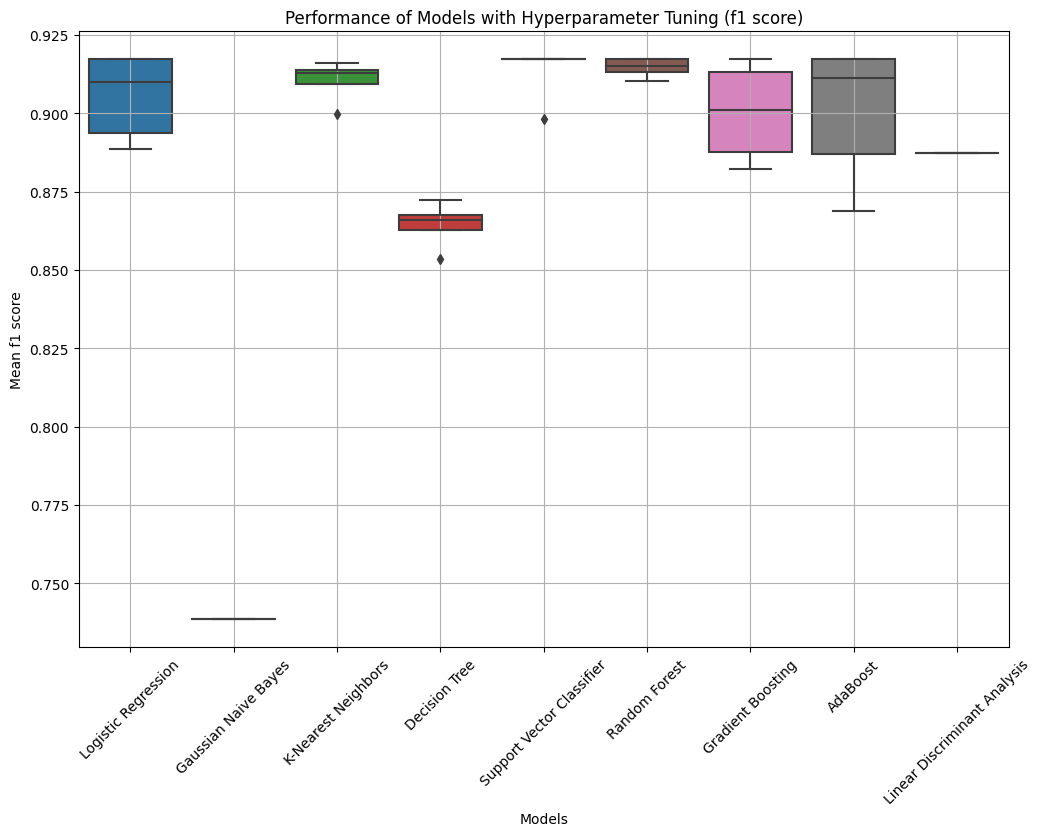

In [28]:
# Perform grid search for each model
best_models = {}
model_scores = {}

for name, (model, param_grid) in models_to_tune.items():
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    model_scores[name] = grid_search.best_score_
    
# Sort models based on their scores (from best to worst)
sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted list of models with their scores
for name, score in sorted_models:
    print(f"{name}: {score}")

# Select the best model
best_model_name = sorted_models[0][0]
best_model_f1 = best_models[best_model_name]
print(f"\nBest Model Selected: {best_model_name}")

# List to store mean f1 score for each model
mean_test_f1 = []

# Loop through each model and perform grid search with cross-validation
for name, (model, param_grid) in models_to_tune.items():
    grid_search = GridSearchCV(model, param_grid, cv=skfold, scoring='f1')
    grid_search.fit(X_train, y_train)
    mean_test_f1.append(grid_search.cv_results_['mean_test_score'])

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=mean_test_f1)
plt.title('Performance of Models with Hyperparameter Tuning (f1 score)')
plt.xlabel('Models')
plt.ylabel('Mean f1 score')
plt.xticks(range(len(models_to_tune)), models_to_tune.keys(), rotation=45)
plt.grid(True)
plt.show()

Alternative method to Improving Performnace is Ensemble methods 
Ensemble methods are techniques that combine multiple individual models to improve the overall predictive performance compared to any single model. They work by leveraging the wisdom of the crowd, where the collective decision of multiple models tends to be more accurate and robust than the decision of any individual model. Some popular ensemble methods for improving accuracy include:

Bagging (Bootstrap Aggregating):

Random Forest: Constructs multiple decision trees during training and outputs the mode of the classes as the prediction (classification) or average prediction (regression) of the individual trees.
Bagged Decision Trees: Similar to Random Forest but typically with decision trees as base learners.
Boosting:

AdaBoost (Adaptive Boosting): Iteratively trains weak classifiers (e.g., shallow decision trees) on different subsets of the training data, giving more weight to misclassified samples in subsequent iterations.
Gradient Boosting Machines (GBM): Builds an ensemble of trees sequentially, where each new tree corrects the errors made by the previous ones by fitting residuals.
Stacking (Stacked Generalization):

Stacked Ensemble: Combines the predictions of multiple models (base learners) using a meta-model (often logistic regression or another model) that learns how to best combine the predictions.
Voting:

Voting Classifier: Combines the predictions of multiple base classifiers (e.g., decision trees, SVMs, logistic regression) and predicts the class with the most votes (hard voting) or the class with the highest average probability (soft voting).
Bayesian Model Averaging (BMA):

Bayesian Voting: Instead of using equal weights for all models, assigns different weights to models based on their performance on validation data.

In [29]:
# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

PERFROMANCE ON UNSEEN DATA

ORIGINAL DATA

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Predicting on new data
# New_IMD_data = IMD_Copy.copy().drop('IMDs', axis=1)# Now let's predict on the new data
# # Assuming best_model_f1 is your trained model

# # Now let's predict on the new data
# y_pred_new_data = best_model_f1.predict(New_IMD_data)

# Now let's predict on the new data
y_pred_new_data = best_model_f1.predict(features)

# Print the predictions on the new data
print("Predictions on new data:")
print(y_pred_new_data)

# Calculate evaluation metrics
accuracy = accuracy_score(target, y_pred_new_data)
precision = precision_score(target, y_pred_new_data, average='weighted')
recall = recall_score(target, y_pred_new_data, average='weighted')
f1 = f1_score(target, y_pred_new_data, average='weighted')

# Print evaluation metrics
print(f"Accuracy on validation dataset: {accuracy}")
print(f"Precision on validation dataset: {precision}")
print(f"Recall on validation dataset: {recall}")
print(f"F1-score on validation dataset: {f1}")

Predictions on new data:
[1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1]
Accuracy on validation dataset: 0.9456521739130435
Precision on validation dataset: 0.9474750202538484
Recall on validation dataset: 0.9456521739130435
F1-score on validation dataset: 0.9419868921188549


ON TEST DATA

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# # Split the test data into training and validation sets
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Make predictions on the validation dataset
y_pred_validation = best_model_f1.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_validation)
precision = precision_score(y_test, y_pred_validation, average='weighted')
recall = recall_score(y_test, y_pred_validation, average='weighted')
f1 = f1_score(y_test, y_pred_validation, average='weighted')

# Print evaluation metrics
print(f"Accuracy on test dataset: {accuracy}")
print(f"Precision on test dataset: {precision}")
print(f"Recall on test dataset: {recall}")
print(f"F1-score on test dataset: {f1}")


Accuracy on test dataset: 0.7297297297297297
Precision on test dataset: 0.5497963717141798
Recall on test dataset: 0.7297297297297297
F1-score on test dataset: 0.6271114864864865


In [43]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Predicting on new data
# New_IMD_data = IMD_Copy.copy().drop('IMDs', axis=1)# Now let's predict on the new data
# # Assuming best_model_f1 is your trained model

# # Now let's predict on the new data
# y_pred_new_data = best_model_f1.predict(New_IMD_data)

# # Print the predictions on the new data
# print("Predictions on new data:")
# print(y_pred_new_data)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_validation, y_pred_validation)
# precision = precision_score(y_validation, y_pred_validation, average='weighted')
# recall = recall_score(y_validation, y_pred_validation, average='weighted')
# f1 = f1_score(y_validation, y_pred_validation, average='weighted')

# # Print evaluation metrics
# print(f"Accuracy on validation dataset: {accuracy}")
# print(f"Precision on validation dataset: {precision}")
# print(f"Recall on validation dataset: {recall}")
# print(f"F1-score on validation dataset: {f1}")

In [44]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split

# # Split the training data into training and validation sets
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# # Make predictions on the validation dataset
# y_pred_validation = best_model_f1.predict(X_validation)

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_validation, y_pred_validation)
# precision = precision_score(y_validation, y_pred_validation, average='weighted')
# recall = recall_score(y_validation, y_pred_validation, average='weighted')
# f1 = f1_score(y_validation, y_pred_validation, average='weighted')

# # Print evaluation metrics
# print(f"Accuracy on validation dataset: {accuracy}")
# print(f"Precision on validation dataset: {precision}")
# print(f"Recall on validation dataset: {recall}")
# print(f"F1-score on validation dataset: {f1}")


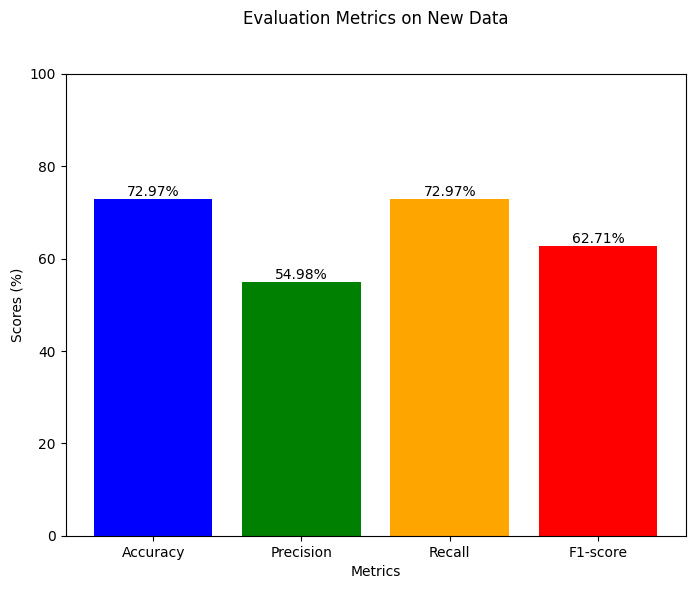

In [45]:
import matplotlib.pyplot as plt

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

# Multiply scores by 100 to convert to percentage
scores_percentage = [score * 100 for score in scores]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, scores_percentage, color=['blue', 'green', 'orange', 'red'])

# Add more space between the chart title and the bar graph
plt.title('Evaluation Metrics on New Data\n\n')

plt.xlabel('Metrics')
plt.ylabel('Scores (%)')  # Adjust y-axis label to indicate percentage
plt.ylim(0, 100)  # Set y-axis limit to range between 0 and 100 for percentages

# Add value labels on top of the bars
for bar, score in zip(bars, scores_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.2f}%'.format(score),
             ha='center', va='bottom')

plt.show()


### FEATURE IMPORTANCE 


Feature importance is a technique used to understand which features have the most impact on a model's predictions. It helps in feature selection, model interpretation, identifying data quality issues, and gaining business insights.

Feature Importances:
                   Feature  Importance
16                  tlbase    0.153043
17                    tl12    0.146476
12                  Stress    0.067038
0             Age_Category    0.047156
13             childworst1    0.046413
26           rs1843809_enc    0.041406
21           HTTLPRrs35531    0.037784
24           Rs1360780_enc    0.035238
19              stin2vntr_    0.034934
15      Viralload_Category    0.034823
23          Rs10482605_enc    0.033342
27          rs34517220_enc    0.032197
6               orphanhood    0.028823
25           rs1386494_enc    0.026769
7                  ses_cat    0.026179
22                 rs35531    0.024809
14            CD4_category    0.022741
20                 httlpr1    0.019104
1                     sex1    0.018942
18  telomere_length_change    0.017556
4             BMI_category    0.017419
3                religion1    0.017170
5               childtrib1    0.016806
2               childeduc1    0.014545
10  

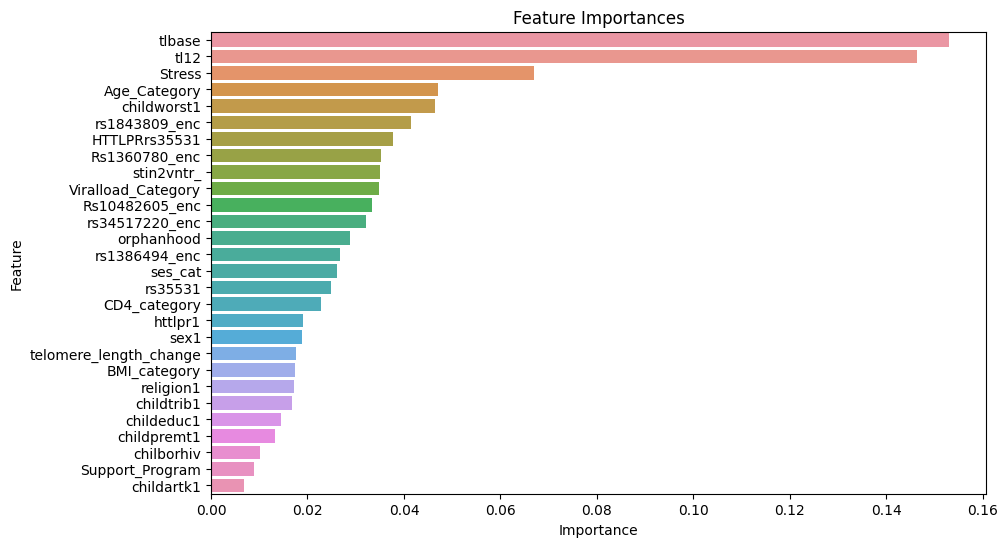

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importances(model, features):
    """
    Plot feature importances for the given model.
    
    Parameters:
        model (object): The trained model for which feature importances are to be plotted.
        features (DataFrame): DataFrame containing the features used for training.
    """
    # Check if the model supports feature importances
    if hasattr(model, 'feature_importances_'):
        # Get feature importances
        feature_importances = model.feature_importances_
        
        # Assuming your features are stored in a DataFrame 'features' with column names
        feature_names = features.columns
        
        # Create a DataFrame to display feature importances
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        
        # Sort the DataFrame by importance in descending order
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        
        # Print or visualize the feature importances
        print("Feature Importances:")
        print(feature_importance_df)

                # Plot feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title('Feature Importances')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print("Feature importances are not available for this model.")

# Assuming 'best_model' is the trained model and 'features' is the DataFrame containing features
plot_feature_importances(best_model, features)